# Fetching Iris Dataset

### 2.1 fetching_iris_dataset.ipynb
### James Saslow
### 4/27/2024

__________________________________________________________________________________________________________


This Jupyter notebook calls the 'iris' dataset from the UCI Machine Learning Repo found here: https://archive.ics.uci.edu/dataset/53/iris. The iris dataset is a 4 - feature dataset with 150 instances intended for classification tasks. This dataset contains 3 classes of data. One class is linearly seperable from the other two, but the other two are not linearly seperable from the others. The features of the dataset are 'sepal length', 'sepal width', 'petal length', and 'petal width' while the class instances are 'Iris-virginica', 'Iris-versicolor', and 'Iris-setosa'.

In this code, I reformat the dataframe to add 2 new column for 'petal width' and 'petal length' which are Min-Max scaled to fit on the interval $\in (0,1)$. Furthermore, 2 additional columns are appended, called 'target' and 'target binary'. 'target' holds the flower classification $\in \{\text{'Iris-virginica'}, \text{'Iris-versicolor'},  \text{'Iris-setosa'} \}$. 'target binary' represents each flower class as binary variables. Here, we map $\text{'Iris-virginica'} \rightarrow 1$, $\text{'Iris-versicolor'} \rightarrow 1$, and $\text{'Iris-setosa'} \rightarrow 0$. Thus, our binary classifier that will train on this data should ideally predict $0$ if the data is in the $\text{'Iris-setosa'}$ and $1$ if it is not in the $\text{'Iris-setosa'}$ class. 

After plotting this data, we see that the '0' and '1' classes are linearly seperable data, and serve as an ideal test case for our binary classification models. After compiling the Jupyter notebook exports a file called *'iris_dataset.csv'* to later be imported into *QNN_iris.ipynb*.

________________________________________________________________________________________________________
[1] A. Daskin, “A simple quantum neural net with a periodic activation function,” 2018 IEEE International Conference on Systems, Man, and Cybernetics (SMC), Oct. 2018. doi:10.1109/smc.2018.00491 

In [1]:
# Importing Packages
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo 

In [2]:
# Defining Functions

def MinMax_Scaling(df, feature_name):
    '''
    Function Description:
    Scales Data in a Pandas dataframe to a [0,1] interval using Min-Max scaling
    and returns an updated data frame with a new column of the scaled feature
    
    Params:
    - df            : A Pandas Dataframe
    - feature_name : A type string of the feature in the dataframe you want to Min-Max scale
    '''

    x = np.array(df[feature_name])
    
    x_scaled = (x-min(x))/(max(x) - min(x))  # Min - Max Scaling of user-specified feature

    df[feature_name + " scaled"] = x_scaled # Updating the dataframe with a new column of the scaled variable

    return df

In [3]:
# Fetching Dataset
iris = fetch_ucirepo(id=53) 
  
df = iris.data.features # Making a pandas dataframe of the iris features
num_data = len(df)      # Counting the number of data points


df = MinMax_Scaling(df, "petal length") # MinMax scaling the 'petal length'
df = MinMax_Scaling(df, "petal width")  # MinMax scaling the 'petal width'

df['targets'] = iris.data.targets       # Appending a column that contains the flower name


# Assigning binary class labels: If 'Iris-setosa'->0 , else -> 1 
binary_targets = []
targets = df['targets'].values
for i in range(num_data):
    if targets[i] ==  'Iris-setosa':
        binary_targets.append(0)
    else:
        binary_targets.append(1)


# Adding Binary Labelings to the Dataframe
df['binary targets'] = binary_targets

df = df.sample(frac=1) # Randomly shuffling around data

# Displaying Dataframe
df

,sepal length,sepal width,petal length,petal width,petal length scaled,petal width scaled,targets,binary targets
142,5.8,2.7,5.1,1.9,0.694915,0.750000,Iris-virginica,1
42,4.4,3.2,1.3,0.2,0.050847,0.041667,Iris-setosa,0
8,4.4,2.9,1.4,0.2,0.067797,0.041667,Iris-setosa,0
9,4.9,3.1,1.5,0.1,0.084746,0.000000,Iris-setosa,0
18,5.7,3.8,1.7,0.3,0.118644,0.083333,Iris-setosa,0
...,...,...,...,...,...,...,...,...
45,4.8,3.0,1.4,0.3,0.067797,0.083333,Iris-setosa,0
131,7.9,3.8,6.4,2.0,0.915254,0.791667,Iris-virginica,1
97,6.2,2.9,4.3,1.3,0.559322,0.500000,Iris-versicolor,1
135,7.7,3.0,6.1,2.3,0.864407,0.916667,Iris-virginica,1


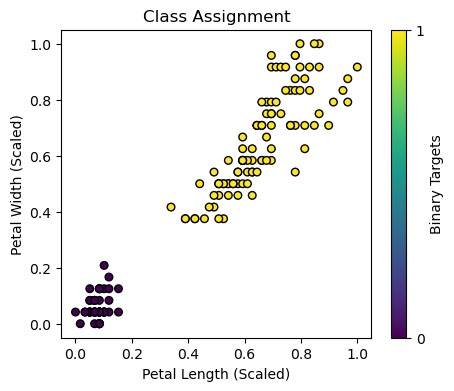

In [10]:
# Data Visualization

# Calling petal length, width, & binary class assignment
petal_length = df["petal length scaled"].values
petal_width  = df["petal width scaled"].values
binary_targets = df["binary targets"]


# Plotting petal width vs petal length and their class assignment
plt.figure(figsize=(5,4))
plt.title('Class Assignment')
plt.scatter(petal_length, petal_width, c = binary_targets,edgecolors='black', s = 30)
plt.xlabel('Petal Length (Scaled)')
plt.ylabel('Petal Width (Scaled)')
plt.colorbar(label='Binary Targets', ticks=[0, 1]) 
plt.show()


In [6]:
# Exporting the Dataframe to a csv file
df.to_csv('iris_dataset.csv', index = False)